### 1. Import Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Minisom library and module is used for performing Self Organizing Maps

from minisom import MiniSom
from sklearn.datasets import load_breast_cancer
import time

In [3]:
# to suppress warnings
from warnings import filterwarnings
filterwarnings('ignore')

### 2. Loading the Data

In [4]:
data, target = load_breast_cancer(True)

In [5]:
# X 
data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [6]:
# Shape of the data:
data.shape

(569, 30)

In [7]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

For Self Organizing Maps, only require X variables, we don't need Y or target variable. Hence, wouldn't be using it. 

Though, the target variable (Y) can be used to understand if the output is matching with input or not. 

### 3. Defining the Hyper Parameters

In [11]:
# Set the hyper parameters
som_grid_rows = 10
som_grid_columns = 10
iterations = 500
sigma = 1
learning_rate = 0.5

With x = 10 and y = 10 as the respective number of rows and number of columns (dimensions) there will be 10* 10 meaning 100 segments.

In [12]:
# The number of features are:
data.shape[1]

30

input_len are the number of features of X 

In [15]:
# define SOM:
som = MiniSom(x = som_grid_rows, y = som_grid_columns, input_len=data.shape[1], sigma=sigma, learning_rate=learning_rate)

# Initializing the weights
som.random_weights_init(data)

In [16]:
# Training
som.train_random(data, iterations) #Training with 500 iterations

In [19]:
# Weights are:
wts = som.weights

In [20]:
# Shape of the weight are:
wts.shape

(10, 10, 30)

In [21]:
# Returns the distance map from the weights:
som.distance_map()

array([[0.00642524, 0.27363124, 0.74628964, 0.36723906, 0.03585371,
        0.11786078, 0.17123888, 0.0755101 , 0.01025747, 0.00608629],
       [0.22994279, 0.78323804, 1.        , 0.45960593, 0.13619089,
        0.22560664, 0.28699801, 0.27109729, 0.25464719, 0.19540475],
       [0.5752268 , 0.87841899, 0.6747015 , 0.31010508, 0.20963836,
        0.12182907, 0.2175314 , 0.37567234, 0.47021703, 0.35999814],
       [0.3174911 , 0.49408115, 0.37124953, 0.25309598, 0.11981175,
        0.02807541, 0.16610214, 0.35800305, 0.45527034, 0.18715589],
       [0.22948217, 0.32119643, 0.26606455, 0.32721483, 0.19235665,
        0.18635221, 0.37844253, 0.51375197, 0.37501394, 0.18299969],
       [0.32975331, 0.32884756, 0.25007457, 0.3972218 , 0.23339371,
        0.34279428, 0.53269305, 0.33634244, 0.4293161 , 0.21510086],
       [0.35181823, 0.36832836, 0.24276729, 0.33550516, 0.15488246,
        0.35967286, 0.4125877 , 0.14124251, 0.33328841, 0.34016249],
       [0.44497444, 0.36869908, 0.3669591

Pcolor() is used to color all MIDs and the window is the bone().

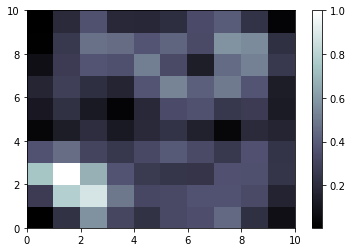

In [23]:
from pylab import plot, axis, show, pcolor, colorbar, bone
bone()
pcolor(som.distance_map().T) # Distance map as background
colorbar()
show()

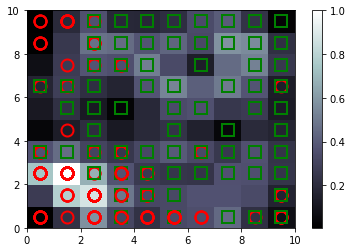

In [24]:
bone()
pcolor(som.distance_map().T) #Distance map as background
colorbar()

# Using different colors and markers for each label for identifying the patients with disease
markers= ['o', 's', 'D']
colors = ['r', 'g', 'b']

for cnt, xx in enumerate(data):
    w= som.winner(xx) # Getting the winner
    # Place a marker on winning position for the sample xx
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[target[cnt]],
         markeredgecolor = colors[target[cnt]],
         markerfacecolor = 'None',
         markersize = 12,
         markeredgewidth = 2)
# axis([0, som._weights.shape[0], 0, som._weights.shape[1]])
show()

- Markers to distinguish frauds
    - Red are Class 0
    - Green are Class 1
- i is the index and x is the vector of each customer
- for each x get the winning node first
- co-ordinates of the winning node are w[0] and w[1], 0.5 is added to center the marker
- s is a square
- marker face color is the inside color of the marker


There are some customers who don't have mapping above so those wouldn't be part of the segments.. 

In [25]:
mappings = som.win_map(data)

In [26]:
mappings

defaultdict(list,
            {(0,
              0): [array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
                     3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
                     8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
                     3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
                     1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01]), array([1.981e+01, 2.215e+01, 1.300e+02, 1.260e+03, 9.831e-02, 1.027e-01,
                     1.479e-01, 9.498e-02, 1.582e-01, 5.395e-02, 7.582e-01, 1.017e+00,
                     5.865e+00, 1.124e+02, 6.494e-03, 1.893e-02, 3.391e-02, 1.521e-02,
                     1.356e-02, 1.997e-03, 2.732e+01, 3.088e+01, 1.868e+02, 2.398e+03,
                     1.512e-01, 3.150e-01, 5.372e-01, 2.388e-01, 2.768e-01, 7.615e-02]), array([2.116e+01, 2.304e+01, 1.372e+02, 1.404e+03, 9.428e-02, 1.022e-01,
                     1.097e

In [33]:
# customers belong to 6, 0: 6th row and 0th column:
mappings.keys()

dict_keys([(0, 0), (2, 1), (1, 2), (8, 0), (0, 9), (6, 0), (5, 0), (9, 0), (0, 2), (1, 9), (2, 8), (6, 3), (4, 0), (2, 2), (6, 9), (3, 0), (0, 3), (2, 0), (3, 2), (2, 9), (4, 1), (9, 1), (7, 8), (7, 2), (3, 3), (8, 6), (3, 7), (8, 3), (1, 1), (2, 4), (7, 9), (5, 9), (5, 4), (4, 2), (4, 3), (8, 2), (7, 4), (2, 3), (1, 3), (9, 4), (8, 8), (8, 7), (9, 6), (6, 5), (5, 2), (5, 8), (2, 7), (0, 6), (4, 9), (9, 7), (8, 5), (1, 6), (9, 8), (9, 3), (3, 8), (3, 1), (5, 5), (0, 8), (1, 0), (7, 6), (2, 6), (1, 5), (2, 5), (4, 8), (4, 6), (4, 7), (7, 3), (6, 8), (1, 4), (7, 0), (9, 9), (9, 5), (6, 2), (6, 7), (9, 2), (3, 9), (1, 7), (5, 3), (5, 1), (8, 9), (5, 6), (3, 5)])

In [ ]:
(0, 0) means that the 0th row and 0th columns (2, 1),  0: 6th row and 0th column:It means that the 

In [34]:
# out of the 100 segments: 68 segments have customers and other 32 segments don't have any customers mapped to it 
len(mappings.keys())

82

Out of the 100 segments there are 82 segments that have patients and other 18 segments do not have any values mapped to it.

Below, 3,3 are the inputs for the winning node 3,3:

In [37]:
mappings[(3,3)]

[array([1.349e+01, 2.230e+01, 8.691e+01, 5.610e+02, 8.752e-02, 7.698e-02,
        4.751e-02, 3.384e-02, 1.809e-01, 5.718e-02, 2.338e-01, 1.353e+00,
        1.735e+00, 2.020e+01, 4.455e-03, 1.382e-02, 2.095e-02, 1.184e-02,
        1.641e-02, 1.956e-03, 1.515e+01, 3.182e+01, 9.900e+01, 6.988e+02,
        1.162e-01, 1.711e-01, 2.282e-01, 1.282e-01, 2.871e-01, 6.917e-02]),
 array([1.462e+01, 2.402e+01, 9.457e+01, 6.627e+02, 8.974e-02, 8.606e-02,
        3.102e-02, 2.957e-02, 1.685e-01, 5.866e-02, 3.721e-01, 1.111e+00,
        2.279e+00, 3.376e+01, 4.868e-03, 1.818e-02, 1.121e-02, 8.606e-03,
        2.085e-02, 2.893e-03, 1.611e+01, 2.911e+01, 1.029e+02, 8.037e+02,
        1.115e-01, 1.766e-01, 9.189e-02, 6.946e-02, 2.522e-01, 7.246e-02]),
 array([1.385e+01, 1.721e+01, 8.844e+01, 5.887e+02, 8.785e-02, 6.136e-02,
        1.420e-02, 1.141e-02, 1.614e-01, 5.890e-02, 2.185e-01, 8.561e-01,
        1.495e+00, 1.791e+01, 4.599e-03, 9.169e-03, 9.127e-03, 4.814e-03,
        1.247e-02, 1.708e-03, 1.54

In [30]:
breast_cancer_segments = np.concatenate((mappings[(3,2)], mappings[(3,3)]), axis = 0)

In [32]:
breast_cancer_segments

array([[1.425e+01, 2.172e+01, 9.363e+01, 6.330e+02, 9.823e-02, 1.098e-01,
        1.319e-01, 5.598e-02, 1.885e-01, 6.125e-02, 2.860e-01, 1.019e+00,
        2.657e+00, 2.491e+01, 5.878e-03, 2.995e-02, 4.815e-02, 1.161e-02,
        2.028e-02, 4.022e-03, 1.589e+01, 3.036e+01, 1.162e+02, 7.996e+02,
        1.446e-01, 4.238e-01, 5.186e-01, 1.447e-01, 3.591e-01, 1.014e-01],
       [1.442e+01, 1.977e+01, 9.448e+01, 6.425e+02, 9.752e-02, 1.141e-01,
        9.388e-02, 5.839e-02, 1.879e-01, 6.390e-02, 2.895e-01, 1.851e+00,
        2.376e+00, 2.685e+01, 8.005e-03, 2.895e-02, 3.321e-02, 1.424e-02,
        1.462e-02, 4.452e-03, 1.633e+01, 3.086e+01, 1.095e+02, 8.264e+02,
        1.431e-01, 3.026e-01, 3.194e-01, 1.565e-01, 2.718e-01, 9.353e-02],
       [1.754e+01, 1.932e+01, 1.151e+02, 9.516e+02, 8.968e-02, 1.198e-01,
        1.036e-01, 7.488e-02, 1.506e-01, 5.491e-02, 3.971e-01, 8.282e-01,
        3.088e+00, 4.073e+01, 6.090e-03, 2.569e-02, 2.713e-02, 1.345e-02,
        1.594e-02, 2.658e-03, 2.042e

In [31]:
breast_cancer_segments.shape

(33, 30)

------------